## `Activation Function` in Python

In [4]:
import numpy as np
from nnfs.datasets import spiral_data

import matplotlib.pyplot as plt

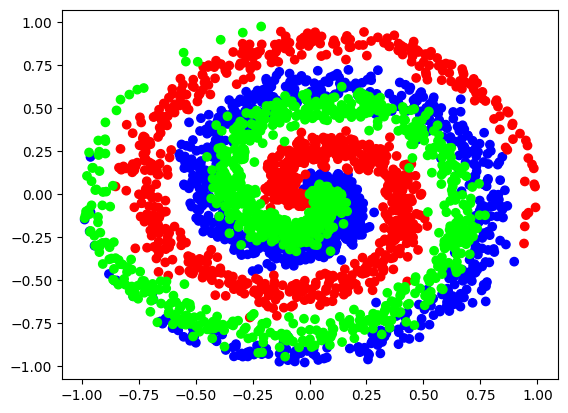

In [5]:
## Generating random data using Python

X,y = spiral_data(1000, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

### `ReLU` Activation Function

In [7]:
## Sample testing ReLU function

input_arr = [10.5, 1.7, -5.3, 2.5, -3.1, -.01, .001]
output_arr = np.maximum(0, input_arr)
print(output_arr)

[1.05e+01 1.70e+00 0.00e+00 2.50e+00 0.00e+00 0.00e+00 1.00e-03]


In [8]:
## Creating class of ReLU function

class ReLU:
    def forward(self, inputs):
        self.outputs = np.maximum(0, inputs)

### `SoftMax` Activation Function

In [20]:
## sample testing Softmax Activation Function

A = np.array([[1, 2, 3, 2.5],
     [2, 5, -1, 2],
     [-1.5, 2.7, 3.3, -0.8]])
## calculating matrix - max columnwise
exp_values = np.exp(A - np.max(A, axis = 1, keepdims = True))
## output given by softmax function
output_values = exp_values/np.sum(exp_values, axis = 1, keepdims=True)
print(output_values)
## check probability Sum
np.sum(output_values,axis = 1, keepdims=True)

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


array([[1.],
       [1.],
       [1.]])

In [21]:
## Class of Softmax

class SOFTMAX:
    def forward(self, inputs):
        exp_val = np.exp(inputs - np.max(inputs, axis = 1, keepdims= True))
        self.outputs = exp_val/np.sum(exp_val, axis = 1, keepdims=True)

### Implementing the `Forward` pass

In [28]:
## creating Dense Layer Class then SoftMax and ReLU Activation Class

class Dense_Layer:
    def __init__(self, n_inputs, n_neurons):
        self.n_inputs = n_inputs
        self.n_neurons = n_neurons
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.outputs = np.dot(inputs, self.weights) + self.biases
    
## Activation Function - ReLU
class ReLU:
    def forward(self, inputs):
        self.outputs = np.maximum(0, inputs)
    
## Activation Function - SoftMax
class SoftMax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims= True))
        probabilities = exp_values/np.sum(exp_values, axis = 1, keepdims=True)
        self.outputs = probabilities

In [33]:
## Implementing the Forward Path
denseLayer1 = Dense_Layer(2,3)
activation_relu = ReLU()
denseLayer2 = Dense_Layer(3,3)
activation_softmax = SoftMax()

## Input -> Neuron -> ReLU -> Neuron2 -> SoftMax -> Output
denseLayer1.forward(X)
## ReLU Activation Function
activation_relu.forward(denseLayer1.outputs)
## Neurons 2
denseLayer2.forward(activation_relu.outputs)
## SoftMax Activation Function
activation_softmax.forward(denseLayer2.outputs)
## print the output from SoftMax Activation Layer
activation_softmax.outputs[:10]


array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333334, 0.33333332, 0.33333334],
       [0.3333334 , 0.33333337, 0.33333323],
       [0.33333336, 0.33333331, 0.33333333],
       [0.33333332, 0.33333323, 0.33333345],
       [0.33333329, 0.33333318, 0.33333352],
       [0.33333337, 0.33333325, 0.33333338],
       [0.33333327, 0.33333312, 0.33333361],
       [0.33333327, 0.33333311, 0.33333362],
       [0.33333326, 0.33333309, 0.33333365]])